# Phase 2: Exploratory Data Analysis (EDA)


In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload dataset
data = pd.read_csv('/Users/AndreaLopera/Desktop/Data Science Portfolio/Production-Line-Intelligence-Dashboard-main/data/production_data.csv') 
data.head()

,production_date,shift,shift_start_time,unit_id,product_type,product_category,cutting_time,tempering_time,framing_time,qc_result,rework_flag,downtime_minutes,rework_reason
0,2025-05-01,Shift 1,2025-05-01 06:00:00,G-0001,Standard,Doors,5.59,13.34,14.78,Pass,0,0,NaN
1,2025-05-01,Shift 2,2025-05-01 14:00:00,G-0002,Standard,Stairs,11.71,16.15,9.78,Pass,0,0,NaN
2,2025-05-01,Shift 3,2025-05-01 22:00:00,G-0003,Standard,Doors,8.88,17.07,6.70,Pass,0,2,NaN
3,2025-05-02,Shift 1,2025-05-02 06:00:00,G-0004,Custom,Walls,10.43,18.25,13.03,Pass,0,0,NaN
4,2025-05-02,Shift 2,2025-05-02 14:00:00,G-0005,Custom,Doors,7.31,18.38,14.94,Pass,0,2,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   production_date   300 non-null    object 
 1   shift             300 non-null    object 
 2   shift_start_time  300 non-null    object 
 3   unit_id           300 non-null    object 
 4   product_type      300 non-null    object 
 5   product_category  300 non-null    object 
 6   cutting_time      300 non-null    float64
 7   tempering_time    300 non-null    float64
 8   framing_time      300 non-null    float64
 9   qc_result         300 non-null    object 
 10  rework_flag       300 non-null    int64  
 11  downtime_minutes  300 non-null    int64  
 12  rework_reason     27 non-null     object 
dtypes: float64(3), int64(2), object(8)
memory usage: 30.6+ KB


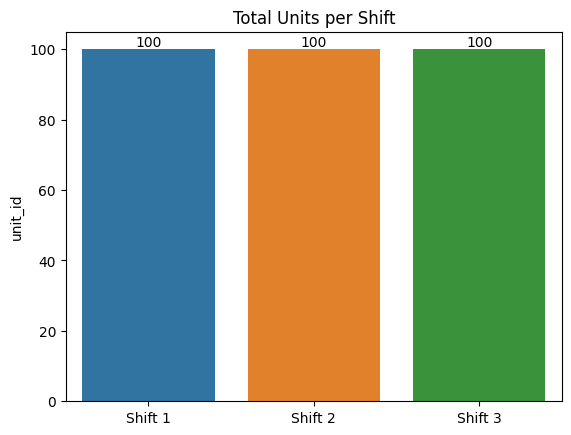

In [17]:
# Review total units per shift
# Table
units_per_shift = data.groupby('shift')['unit_id'].count().reset_index()
ax = sns.barplot(data=units_per_shift, x='shift', y='unit_id', hue='shift')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Total Units per Shift')
plt.xlabel('')
plt.show()

In [5]:
# Average cycle time
# Table 
data['cycle_time'] = data['cutting_time']+ data['tempering_time']+ data['framing_time']
cycle_by_category = data.groupby('product_category')['cycle_time'].mean().reset_index()
cycle_by_category

,product_category,cycle_time
0,Doors,36.575614
1,Flooring,36.133243
2,Partitions,36.791481
3,Stairs,37.498537
4,Walls,37.028889


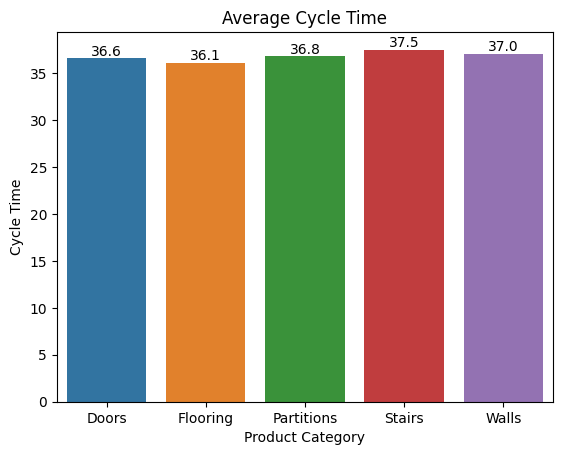

In [6]:
# Average cycle time
# Graph
ax = sns.barplot(data=cycle_by_category, x="product_category", y="cycle_time", hue="product_category")
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')
plt.title("Average Cycle Time")
plt.xlabel("Product Category")
plt.ylabel("Cycle Time")
plt.show()

In [7]:
# Rework rate by shift
# Table 
rework_rate = data.groupby('shift').agg(
    total_units = ('unit_id', 'count'), 
    reworked_units = ('rework_flag', 'sum'), 
    rework_rate = ('rework_flag', lambda x: x.mean() * 100)
    ).reset_index()

rework_rate

,shift,total_units,reworked_units,rework_rate
0,Shift 1,100,12,12.0
1,Shift 2,100,5,5.0
2,Shift 3,100,10,10.0


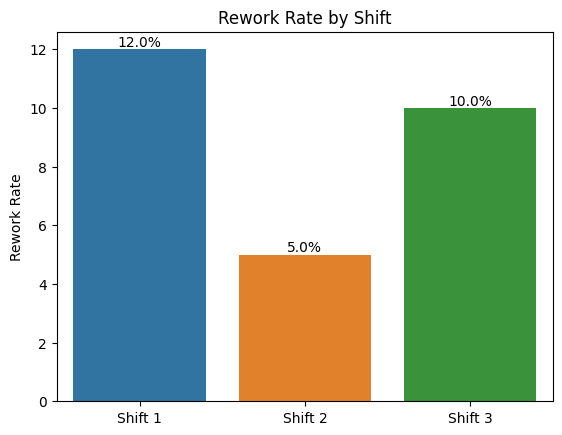

In [8]:
# Rework rate by shift
# Graph
ax = sns.barplot(data=rework_rate, x='shift', y='rework_rate', hue='shift')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='edge')
plt.title('Rework Rate by Shift')
plt.xticks(rotation=0)
plt.ylabel('Rework Rate')
plt.xlabel('')
plt.show()

In [14]:
# Average downtime by product category
# Table
avg_downtime = data.groupby('product_category')['downtime_minutes'].mean().reset_index()
avg_downtime

,product_category,downtime_minutes
0,Doors,3.140351
1,Flooring,4.945946
2,Partitions,1.444444
3,Stairs,5.341463
4,Walls,3.086420


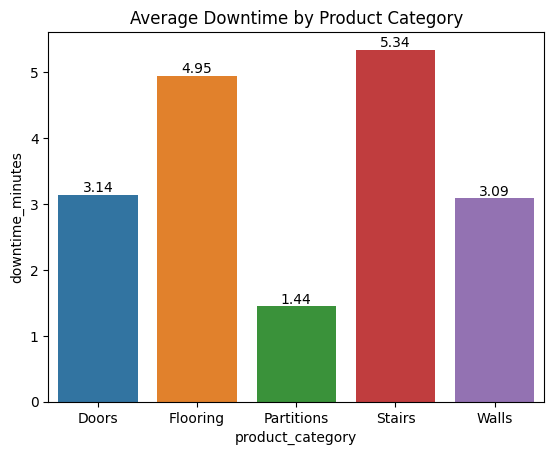

In [ ]:
# Average downtime by product category
# Graph
ax = sns.barplot(data=avg_downtime, x='product_category', y='downtime_minutes', hue='product_category')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.title('Average Downtime by Product Category')
plt.show()

In [11]:
# Rework Reasons Distribution
# Table
rework_counts = data.groupby('rework_reason')['shift'].count()
rework_counts

rework_reason
Contamination            6
Edge chip                5
Incorrect dimensions    10
Misaligned frame         3
Scratched glass          3
Name: shift, dtype: int64

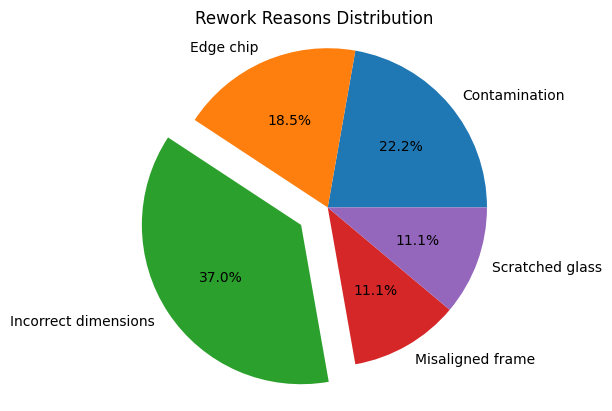

In [12]:
# Rework Reasons Distribution
# Graph
sizes = rework_counts.values.tolist()
labels = rework_counts.index.tolist()
my_explode = [0, 0, 0.2, 0, 0]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=my_explode)
plt.title('Rework Reasons Distribution')
plt.axis('equal')
plt.grid('both')
plt.show()